In [1]:
import numpy as np
import napari
import tifffile
from skimage import measure
import csv
import pandas as pd


In [12]:
em_stack = tifffile.imread(r'\\tungsten-nas.fmi.ch\tungsten\scratch\gfriedri\montruth\CLEM_Analyses\CLEM_20220426_RM0008_130hpf_fP1_f3\bigwarp_alignment\fine_aligned_downsampled_4_em_stack_cropped_woResin_rough_rotated_to_LM.tif')
em_mask = tifffile.imread(r'\\tungsten-nas.fmi.ch\tungsten\scratch\gfriedri\montruth\CLEM_Analyses\CLEM_20220426_RM0008_130hpf_fP1_f3\bigwarp_alignment\fine_aligned_downsampled_4_em_stack_cropped_woResin_rough_rotated_to_LM_cp_masks_cp-1_ft00.tif')

em_mask = np.transpose(em_mask, (2, 0, 1))

In [3]:
em_props = measure.regionprops(em_mask)
em_centroids = np.array([prop.centroid for prop in em_props])


In [4]:
em_centroids.shape
print(em_stack.shape)
print(em_mask.shape)

(996, 288, 1129)
(996, 288, 1129)


In [5]:
viewer = napari.Viewer()
viewer.add_image(em_stack, name='em_stack')
viewer.add_labels(em_mask_rotated, name='em_mask')

<Labels layer 'em_mask' at 0x20689c4f9d0>

In [9]:
viewer.add_points(em_centroids, name='em_centroids')

<Points layer 'em_centroids' at 0x20707078f40>

In [6]:
props = measure.regionprops_table(em_mask, em_stack,
                          properties=['label', 'area',
                                       "solidity"])


D:\montruth\PycharmProjects\samplePy\.venv\lib\site-packages\skimage\measure\_regionprops.py:459: UserWarning: Failed to get convex hull image. Returning empty image, see error message below:
QH6154 Qhull precision error: Initial simplex is flat (facet 1 is coplanar with the interior point)

While executing:  | qhull i Qt
Options selected for Qhull 2019.1.r 2019/06/21:
  run-id 395469892  incidence  Qtriangulate  _pre-merge  _zero-centrum
  _max-width 10  Error-roundoff 1.4e-14  _one-merge 9.7e-14
  _near-inside 4.9e-13  Visible-distance 2.8e-14  U-max-coplanar 2.8e-14
  Width-outside 5.5e-14  _wide-facet 1.7e-13  _maxoutside 1.1e-13

The input to qhull appears to be less than 3 dimensional, or a
computation has overflowed.

Qhull could not construct a clearly convex simplex from points:
- p54(v4):     8     0    10
- p7(v3):     1     0     0
- p55(v2):     9     0     8
- p0(v1):     0     0     1

The center point is coplanar with a facet, or a vertex is coplanar
with a neighboring 

In [7]:

data = pd.DataFrame(props)
data.head()

,label,area,solidity
0,1,566.0,0.547389
1,2,2779.0,0.708567
2,3,112.0,0.099467
3,4,67.0,0.364130
4,5,95.0,0.472637


In [8]:
data.shape

(11288, 3)

In [10]:
data["equivalent_diameter"] = (6 * data["area"]  / np.pi) ** (1/3)
data.head()

,label,area,solidity,equivalent_diameter
0,1,566.0,0.547389,10.262959
1,2,2779.0,0.708567,17.443353
2,3,112.0,0.099467,5.980532
3,4,67.0,0.364130,5.039167
4,5,95.0,0.472637,5.661198


In [11]:
data.describe()

D:\montruth\PycharmProjects\samplePy\.venv\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,label,area,solidity,equivalent_diameter
count,11288.000000,11288.000000,1.128800e+04,11288.000000
mean,5644.500000,6021.088944,inf,21.185492
std,3258.709254,2703.376037,NaN,6.189492
min,1.000000,12.000000,1.725200e-02,2.840496
25%,2822.750000,5650.500000,8.032047e-01,22.098498
50%,5644.500000,6840.000000,8.656753e-01,23.551532
75%,8466.250000,7698.000000,8.925774e-01,24.497763
max,11288.000000,24728.000000,inf,36.146267


(array([424., 201., 105.,  65.,  44.,  50.,  32.,  32.,  26.,  25.,  22.,
         18.,  23.,  27.,  21.,  19.,  24.,  21.,  21.,  26.,  25.,  30.,
         35.,  32.,  45.,  31.,  53.,  35.,  58.,  72.,  71., 108., 127.,
        164., 178., 231., 260., 284., 350., 346., 361., 357., 422., 425.,
        443., 446., 504., 486., 488., 402., 397., 374., 304., 266., 199.,
        161., 152., 119.,  80.,  66.,  48.,  38.,  32.,  18.,  15.,  10.,
         12.,  10.,   2.,   5.,   4.,   5.,   4.,   2.,   1.,   0.,   1.,
          4.,   2.,   1.,   3.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([3.000000e+00, 1.254200e+02, 2.478400e+02, 3.702600e+02,
        4.926800e+02, 6.151000e+02, 7.375200e+02, 8.599400e+02,
        9.823600e+02, 1.104780e+03, 1.227200e+03, 1.349620e+03,
        1.472040e+03, 1.594460e+03, 1.716880e+03, 1.839300e+03,
        1.961720e+03, 2.084140e+03, 2.206560e+03, 2.328980e+03

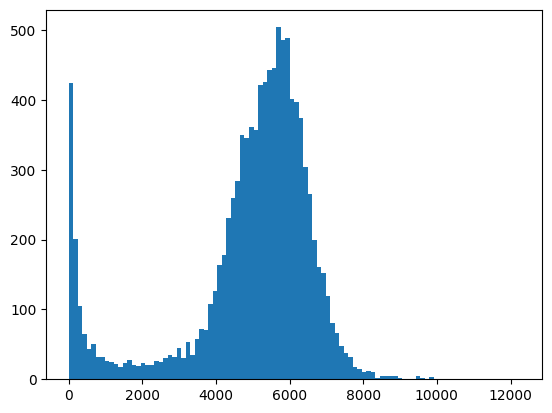

In [22]:
from matplotlib import pyplot as plt
plt.hist(data["area"], bins=100)

(array([  1.,   0.,   0.,   0.,  12.,  26.,  21.,  32.,  35.,  38.,  36.,
         40.,  39.,  47.,  45.,  38.,  39.,  27.,  40.,  26.,  30.,  40.,
         29.,  24.,  26.,  23.,  23.,  23.,  19.,  18.,  20.,  12.,  16.,
         23.,  19.,  19.,   9.,  16.,  17.,  12.,  19.,  10.,  17.,  16.,
         13.,   9.,  20.,  15.,  19.,  17.,  17.,  20.,  19.,  15.,  20.,
         21.,  30.,  30.,  37.,  40.,  41.,  52.,  49.,  68.,  95., 107.,
        159., 229., 275., 370., 452., 531., 557., 655., 711., 770., 855.,
        760., 690., 538., 402., 280., 166., 105.,  60.,  30.,  20.,  11.,
         11.,   5.,   2.,   6.,   4.,   1.,   1.,   1.,   0.,   0.,   0.,
          1.]),
 array([ 1.78940046,  2.05747618,  2.3255519 ,  2.59362762,  2.86170333,
         3.12977905,  3.39785477,  3.66593049,  3.93400621,  4.20208193,
         4.47015765,  4.73823337,  5.00630909,  5.27438481,  5.54246053,
         5.81053624,  6.07861196,  6.34668768,  6.6147634 ,  6.88283912,
         7.15091484,  7.41

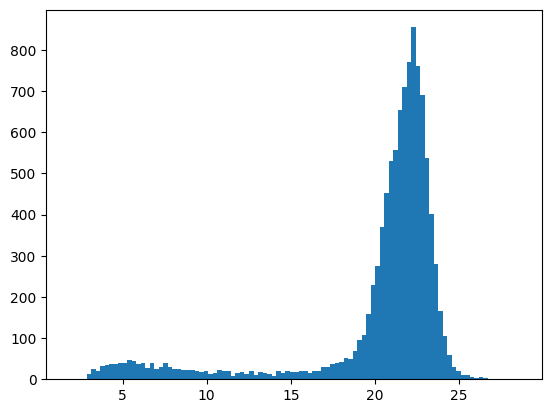

In [23]:
plt.hist(data["equivalent_diameter"], bins=100)

(array([3.000e+00, 1.000e+00, 3.000e+00, 0.000e+00, 4.000e+00, 2.000e+00,
        0.000e+00, 2.000e+00, 5.000e+00, 1.000e+00, 3.000e+00, 3.000e+00,
        5.000e+00, 6.000e+00, 7.000e+00, 3.000e+00, 5.000e+00, 5.000e+00,
        3.000e+00, 9.000e+00, 5.000e+00, 6.000e+00, 6.000e+00, 8.000e+00,
        1.000e+01, 1.000e+01, 7.000e+00, 8.000e+00, 7.000e+00, 1.600e+01,
        8.000e+00, 9.000e+00, 1.400e+01, 9.000e+00, 5.000e+00, 1.900e+01,
        1.300e+01, 1.100e+01, 1.700e+01, 1.200e+01, 1.600e+01, 2.300e+01,
        1.900e+01, 9.000e+00, 2.000e+01, 1.600e+01, 2.200e+01, 2.500e+01,
        3.100e+01, 2.100e+01, 2.000e+01, 1.500e+01, 2.500e+01, 2.000e+01,
        2.200e+01, 3.300e+01, 2.200e+01, 2.400e+01, 2.200e+01, 1.700e+01,
        1.700e+01, 2.800e+01, 2.300e+01, 2.900e+01, 2.000e+01, 2.500e+01,
        3.100e+01, 2.900e+01, 3.600e+01, 3.000e+01, 1.800e+01, 1.900e+01,
        2.400e+01, 2.600e+01, 3.300e+01, 1.900e+01, 2.900e+01, 3.900e+01,
        2.900e+01, 3.500e+01, 3.700e+0

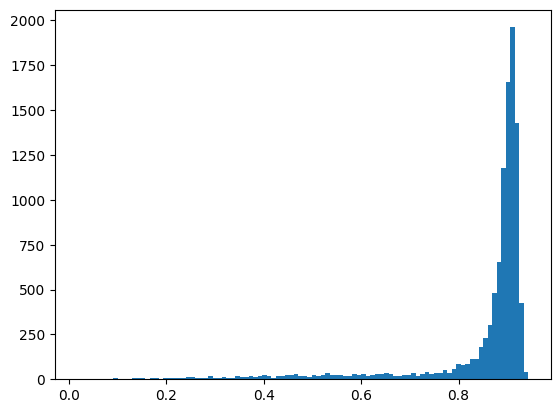

In [27]:
plt.hist(data["solidity"][data["solidity"] != np.inf], bins=100)

In [40]:
# Extract labels with equivalent diameter greater than min_diameter and solidity greater than 0.7
cell_filter = data["label"][(data["equivalent_diameter"] > 10) & (data["solidity"] > 0.7) & (data["area"] > 1800)].values.tolist()

morphology_filter = (data["equivalent_diameter"] > 10) & (data["solidity"] > 0.7) & (data["area"] > 1800)
print(morphology_filter)


0         True
1         True
2         True
3         True
4         True
         ...  
10429    False
10430    False
10431    False
10432    False
10433    False
Length: 10434, dtype: bool


In [16]:
# Flatten the 3D array to 1D
em_mask_labels_flat = (em_mask.flatten())

# Convert the flattened array to a pandas Series
em_mask_labels_series = pd.Series(em_mask_labels_flat)

# Check if em_mask_labels contains any of the filtered labels
result = em_mask_labels_series.isin(cell_filter)

# If you need to reshape the result back to the original shape, you can do so
result_reshaped = result.values.reshape(em_mask.shape)

In [17]:
vw = napari.Viewer()
vw.add_image(em_stack)
vw.add_labels(result_reshaped)

D:\montruth\PycharmProjects\samplePy\.venv\lib\site-packages\napari\plugins\_plugin_manager.py:555: UserWarning: Plugin 'napari-animated-gif-io' has already registered a function widget 'save as animated gif' which has now been overwritten
  warn(message=warn_message)


<Labels layer 'result_reshaped' at 0x187cbc257b0>

In [25]:
cell_filter

AttributeError: 'list' object has no attribute 'shape'

In [44]:
em_centroids_filtered = em_centroids[morphology_filter]
vw.add_points(em_centroids_filtered)

<Points layer 'em_centroids_filtered [1]' at 0x188060e6d10>

In [15]:
viewer = napari.Viewer()
viewer.add_image(em_stack)
labels_layer = viewer.add_labels(em_mask)
viewer.add_points(em_centroids)

D:\montruth\PycharmProjects\samplePy\.venv\lib\site-packages\napari\plugins\_plugin_manager.py:555: UserWarning: Plugin 'napari-animated-gif-io' has already registered a function widget 'save as animated gif' which has now been overwritten
  warn(message=warn_message)


<Points layer 'em_centroids' at 0x246dec3f160>

In [14]:
# Initialize a stack to store mask states for undo functionality
mask_state_stack = []

# Function to save the current state of the mask
def save_mask_state():
    mask_state_stack.append(labels_layer.data.copy())
    if len(mask_state_stack) > 10:  # Limit the stack size to 10 for memory efficiency
        mask_state_stack.pop(0)

# Function to undo the last action
@viewer.bind_key('z')  # Press 'Ctrl+Z' to undo
def undo_mask(viewer):
    if mask_state_stack:
        last_state = mask_state_stack.pop()
        labels_layer.data = last_state
        print('Undo action performed')
@viewer.bind_key('d')  # Press 'd' to delete the selected mask
def delete_mask(viewer):
    labels_layer = viewer.layers['Mask']
    labels_layer.data = np.zeros_like(labels_layer.data)
    print('Mask deleted')

In [13]:
# Reorder centroids with flipped coordinates
new_landmarks = em_centroids[:, ::-1]

#Randomly selected indices 
selected_indices = np.random.choice(len(em_centroids), len(em_centroids), replace=False)

#Selected and randomized centroids as strings.
selected_centroids = new_landmarks[selected_indices].astype(str)

#Create list of randomized centroids
new_landmarks_rnd = selected_centroids.tolist()


In [15]:
# Create an empty DataFrame with the correct number of columns
columns = ['Point_id', 'matched', 'moving_x', 'moving_y', 'moving_z', 'fixed_x', 'fixed_y', 'fixed_z']
landmarks_df = pd.DataFrame(columns=columns)

# Generate new point IDs
last_id = -1
new_point_ids = [f"Pt-{i}" for i in range(last_id + 1, last_id + 1 + len(new_landmarks_rnd))]

# Prepare the new landmarks for appending
for point_id, landmark in zip(new_point_ids, new_landmarks_rnd):

    new_row = [point_id, "false", "Infinity", "Infinity", "Infinity"] + landmark
    print(new_row)
    landmarks_df.loc[len(landmarks_df)] = new_row

# Save the updated DataFrame to a new CSV file
updated_file_path = r'\\tungsten-nas.fmi.ch\tungsten\scratch\gfriedri\montruth\CLEM_Analyses\CLEM_20220426_RM0008_130hpf_fP1_f3\bigwarp_alignment\unmatched_landmarks_mov_LM_fix_EM_cp-1_ft00.csv'
landmarks_df.to_csv(updated_file_path, index=False, header=None, quoting=csv.QUOTE_NONNUMERIC)

landmarks_df = pd.DataFrame(columns=columns)
for point_id, landmark in zip(new_point_ids, new_landmarks_rnd):

    new_row = [point_id, "false"]+ landmark +["Infinity", "Infinity", "Infinity"] 
    print(new_row)
    landmarks_df.loc[len(landmarks_df)] = new_row

# Save the updated DataFrame to a new CSV file
updated_file_path = r'\\tungsten-nas.fmi.ch\tungsten\scratch\gfriedri\montruth\CLEM_Analyses\CLEM_20220426_RM0008_130hpf_fP1_f3\bigwarp_alignment\unmatched_landmarks_mov_EM_fix_LM_cp-1_ft00.csv'
landmarks_df.to_csv(updated_file_path, index=False, header=None, quoting=csv.QUOTE_NONNUMERIC)

print("Updated file saved to:", updated_file_path)

['Pt-0', 'false', 'Infinity', 'Infinity', 'Infinity', '496.2203201113431', '226.48100208768267', '797.9604732080724']
['Pt-1', 'false', 'Infinity', 'Infinity', 'Infinity', '618.8692449355433', '35.40178023327194', '540.4135972989565']
['Pt-2', 'false', 'Infinity', 'Infinity', 'Infinity', '376.51621484671904', '103.97884469217126', '768.1327590575121']
['Pt-3', 'false', 'Infinity', 'Infinity', 'Infinity', '1021.7786610878661', '29.790097629009765', '301.6468619246862']
['Pt-4', 'false', 'Infinity', 'Infinity', 'Infinity', '268.19357318573185', '79.7369311193112', '844.1725092250922']
['Pt-5', 'false', 'Infinity', 'Infinity', 'Infinity', '46.94328167438888', '96.63412685732546', '521.6876497843106']
['Pt-6', 'false', 'Infinity', 'Infinity', 'Infinity', '398.8069970225436', '15.085495533815397', '80.76999149298172']
['Pt-7', 'false', 'Infinity', 'Infinity', 'Infinity', '186.19107446669284', '143.62609606072505', '692.7040963224708']
['Pt-8', 'false', 'Infinity', 'Infinity', 'Infinity', '5

In [16]:
new_landmarks_rnd[0]

['496.2203201113431', '226.48100208768267', '797.9604732080724']

In [64]:
# Convert the numpy array to a list of tuples if it's not already
centroid_list = [tuple(centroid) for centroid in em_centroids]

# Create a DataFrame with unique IDs and centroids
centroids_lut = pd.DataFrame({
    'id': range(1, len(centroid_list) + 1),
    'em_centroids_zyx_px': centroid_list
})



In [65]:
centroids_lut.head()

,id,em_centroids_zyx_px
0,1,"(292.07773851590105, 2.097173144876325, 34.254416961130744)"
1,2,"(216.02410939186757, 2.485066570708888, 40.27060093558834)"
2,3,"(290.19642857142856, 2.044642857142857, 36.955357142857146)"
3,4,"(299.05970149253733, 1.7014925373134329, 42.16417910447761)"
4,5,"(300.7578947368421, 2.3157894736842106, 36.72631578947368)"


In [66]:
centroids_lut.to_csv(r'\\tungsten-nas.fmi.ch\tungsten\scratch\gfriedri\montruth\CLEM_Analyses\CLEM_20220426_RM0008_130hpf_fP1_f3\bigwarp_alignment\lut_centroids.csv', index=False)
